In [1]:
#Seth Hensley
#801055921
#Homework 3

import tensorflow as tf
import keras 
import numpy as np 
import matplotlib.pyplot as plt

(xtrain, ytrain), (xtest, ytest)= tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


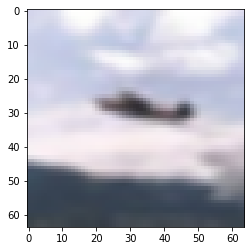

In [2]:
xtrain=tf.image.resize(xtrain,(64,64))
xtest=tf.image.resize(xtest,(64,64))


xtrain = xtrain/255.0

#ytrain = ytrain/255.0

xtest = xtest/255.0

#ytest = ytest/255.0

plt.imshow(xtrain[42069,:,:],cmap='Greys')

In [3]:
def resnet_block(inputs, filters, kernel_size, strides):
    x = keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = keras.layers.Conv2D(filters=filters, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = keras.layers.BatchNormalization()(x)

    shortcut = inputs
    if strides != 1 or inputs.shape[-1] != filters:
        shortcut = keras.layers.Conv2D(filters=filters, kernel_size=1, strides=strides, padding='same')(inputs)
        shortcut = keras.layers.BatchNormalization()(shortcut)

    x = keras.layers.Add()([x, shortcut])
    x = keras.layers.Activation('relu')(x)
    return x



def resnet18():
    inputs = keras.Input(shape=(64,64,3))
    x = keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = resnet_block(x, filters=64, kernel_size=3, strides=1)
    x = resnet_block(x, filters=64, kernel_size=3, strides=1)

    x = resnet_block(x, filters=128, kernel_size=3, strides=2)
    x = resnet_block(x, filters=128, kernel_size=3, strides=1)

    x = resnet_block(x, filters=256, kernel_size=3, strides=2)
    x = resnet_block(x, filters=256, kernel_size=3, strides=1)

    x = resnet_block(x, filters=512, kernel_size=3, strides=2)
    x = resnet_block(x, filters=512, kernel_size=3, strides=1)

    x = keras.layers.GlobalAveragePooling2D()(x)
    outputs = tf.keras.layers.Dense(units=10, activation='softmax')(x)

    model = tf.keras.models.Model(inputs, outputs)
    return model


def resnet26():
    inputs = keras.Input(shape=(64,64,3))
    x = keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    x = resnet_block(x, filters=64, kernel_size=3, strides=1)
    x = resnet_block(x, filters=64, kernel_size=3, strides=1)

    x = resnet_block(x, filters=128, kernel_size=3, strides=2)
    x = resnet_block(x, filters=128, kernel_size=3, strides=1)

    x = resnet_block(x, filters=256, kernel_size=3, strides=2)
    x = resnet_block(x, filters=256, kernel_size=3, strides=1)

    x = resnet_block(x, filters=512, kernel_size=3, strides=2)
    x = resnet_block(x, filters=512, kernel_size=3, strides=1)

    x = resnet_block(x, filters=1024, kernel_size=3, strides=2)
    x = resnet_block(x, filters=1024, kernel_size=3, strides=1)

    x = resnet_block(x, filters=1024, kernel_size=3, strides=1)

    x = resnet_block(x, filters=2048, kernel_size=3, strides=2)
    x = resnet_block(x, filters=2048, kernel_size=3, strides=1)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs = tf.keras.layers.Dense(units=10, activation='softmax')(x)

    model = tf.keras.models.Model(inputs, outputs)
    return model


def resnet32():
    inputs = keras.Input(shape=(64,64,3))
    x = keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)

    x = resnet_block(x, filters=64, kernel_size=3, strides=1)
    x = resnet_block(x, filters=64, kernel_size=3, strides=1)

    x = resnet_block(x, filters=128, kernel_size=3, strides=2)
    x = resnet_block(x, filters=128, kernel_size=3, strides=1)

    x = resnet_block(x, filters=256, kernel_size=3, strides=2)
    x = resnet_block(x, filters=256, kernel_size=3, strides=1)

    x = resnet_block(x, filters=512, kernel_size=3, strides=2)
    x = resnet_block(x, filters=512, kernel_size=3, strides=1)

    x = resnet_block(x, filters=1024, kernel_size=3, strides=2)
    x = resnet_block(x, filters=1024, kernel_size=3, strides=1)

    x = resnet_block(x, filters=1024, kernel_size=3, strides=2)
    x = resnet_block(x, filters=1024, kernel_size=3, strides=1)

    x = resnet_block(x, filters=2048, kernel_size=3, strides=2)
    x = resnet_block(x, filters=2048, kernel_size=3, strides=1)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs = tf.keras.layers.Dense(units=10, activation='softmax')(x)

    model = tf.keras.models.Model(inputs, outputs)
    return model

In [4]:
model18 = resnet18()
model26 = resnet26()
model32 = resnet32()


In [5]:
model18.compile(optimizer="SGD", loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), metrics=["accuracy"])
model18.summary()

model26.compile(optimizer="adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), metrics=["accuracy"])
model26.summary()

model32.compile(optimizer="adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), metrics=["accuracy"])
model32.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   1792        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 64, 64, 64)   0           ['batch_normalization[0][0]']

In [6]:
  model18.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=10)

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 191s 113ms/step - loss: 1.3858 - accuracy: 0.4953 - val_loss: 1.7085 - val_accuracy: 0.4534
Epoch 2/10
1563/1563 [==============================] - 174s 111ms/step - loss: 0.9210 - accuracy: 0.6740 - val_loss: 1.1615 - val_accuracy: 0.6071
Epoch 3/10
1563/1563 [==============================] - 175s 112ms/step - loss: 0.7015 - accuracy: 0.7536 - val_loss: 1.0198 - val_accuracy: 0.6661
Epoch 4/10
1563/1563 [==============================] - 174s 112ms/step - loss: 0.5577 - accuracy: 0.8061 - val_loss: 1.3082 - val_accuracy: 0.6405
Epoch 5/10
1563/1563 [==============================] - 174s 111ms/step - loss: 0.4396 - accuracy: 0.8479 - val_loss: 1.0750 - val_accuracy: 0.6583
Epoch 6/10
1563/1563 [==============================] - 174s 111ms/step - loss: 0.3234 - accuracy: 0.8887 - val_loss: 1.2720 - val_accuracy: 0.6487
Epoch 7/10
1563/1563 [==============================] - 174s 111ms/step - loss: 0.2266 - accuracy: 0.9237 - val_loss: 0.976

In [7]:

model26.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 667s 413ms/step - loss: 1.5749 - accuracy: 0.4534 - val_loss: 1.5085 - val_accuracy: 0.5288
Epoch 2/10
1563/1563 [==============================] - 643s 411ms/step - loss: 0.9247 - accuracy: 0.6796 - val_loss: 0.8722 - val_accuracy: 0.7020
Epoch 3/10
1563/1563 [==============================] - 644s 412ms/step - loss: 0.6970 - accuracy: 0.7610 - val_loss: 0.9413 - val_accuracy: 0.7064
Epoch 4/10
1563/1563 [==============================] - 643s 412ms/step - loss: 0.5556 - accuracy: 0.8103 - val_loss: 0.7757 - val_accuracy: 0.7439
Epoch 5/10
1563/1563 [==============================] - 632s 404ms/step - loss: 0.4410 - accuracy: 0.8503 - val_loss: 0.9011 - val_accuracy: 0.7563
Epoch 6/10
1563/1563 [==============================] - 643s 411ms/step - loss: 0.3439 - accuracy: 0.8830 - val_loss: 0.6058 - val_accuracy: 0.8083
Epoch 7/10
1563/1563 [==============================] - 643s 411ms/step - loss: 0.2387 - accuracy: 0.9172 - val_

In [8]:

model32.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 656s 405ms/step - loss: 2.0234 - accuracy: 0.3458 - val_loss: 4.2785 - val_accuracy: 0.3096
Epoch 2/10
1563/1563 [==============================] - 631s 404ms/step - loss: 1.8085 - accuracy: 0.3989 - val_loss: 2.8836 - val_accuracy: 0.3945
Epoch 3/10
1563/1563 [==============================] - 630s 403ms/step - loss: 1.6192 - accuracy: 0.4717 - val_loss: 1.5866 - val_accuracy: 0.5013
Epoch 4/10
1563/1563 [==============================] - 630s 403ms/step - loss: 1.2210 - accuracy: 0.5798 - val_loss: 1.0959 - val_accuracy: 0.6050
Epoch 5/10
1563/1563 [==============================] - 631s 403ms/step - loss: 1.0334 - accuracy: 0.6479 - val_loss: 0.8734 - val_accuracy: 0.6879
Epoch 6/10
1563/1563 [==============================] - 617s 395ms/step - loss: 0.8510 - accuracy: 0.7107 - val_loss: 1.1489 - val_accuracy: 0.6421
Epoch 7/10
1563/1563 [==============================] - 617s 395ms/step - loss: 0.7186 - accuracy: 0.7532 - val_